In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.svm import SVC
from sklearn import metrics
from ipywidgets import interact

In [ ]:
# Fit Nonlinear Function:
def test_func(x, err = 0.5):
    y = 10 - 1 / (x + 0.1)
    if err > 0:
        y = np.random.normal(y, err)
    return y

In [ ]:
def make_data(N, error):
    
    # Create Random Data
    np.random.seed(1)
    
    # Convert X to 2-Dimensional
    X = np.random.random(N)[:, np.newaxis]
    
    # Use Ravel to Convert y to 1-Dimensional Data
    target = test_func(X.ravel(), error)
    
    return X, target

In [ ]:
X, target = make_data(40, 1)

# Convert X to 1-Dimensional Data
plt.scatter(X.ravel(), target);

In [ ]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
# Create Line Passing Through Data

# Fit and Test Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, target)
target_test = model.predict(X_test)

plt.scatter(X.ravel(), target)
plt.plot(X_test.ravel(), target_test)
print ("Mean Squared Error:", metrics.mean_squared_error(model.predict(X), target))
# Unbiased Estimate of Error Variance

In [6]:
class PolynomialRegression(LinearRegression):
    """Simple Polynomial Regression to 1D data"""
    def __init__(self, degree=1, **kwargs):
        self.degree = degree
        LinearRegression.__init__(self, **kwargs)
        
    def fit(self, X, target):
        if X.shape[1] != 1:
            raise ValueError("Only 1D data valid here")
        Xp = X ** (1 + np.arange(self.degree))
        return LinearRegression.fit(self, Xp, target)
        
    def predict(self, X):
        Xp = X ** (1 + np.arange(self.degree))
        return LinearRegression.predict(self, Xp)

Mean Squared Error: 0.375549645038


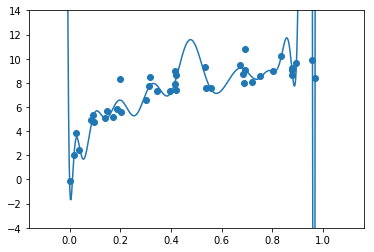

In [7]:
# Using a Higher Degree Polynomial 
model = PolynomialRegression(degree=30)
model.fit(X, target)
target_test = model.predict(X_test)

plt.scatter(X.ravel(), target)
plt.plot(X_test.ravel(), target_test)
plt.ylim(-4, 14)
print ("Mean Squared Error:", metrics.mean_squared_error(model.predict(X), target))

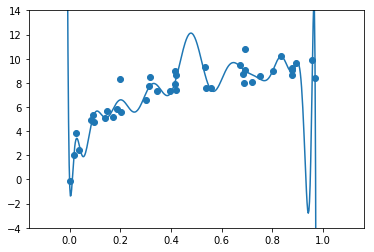

In [8]:
@interact(the_degree=[1,30,1])
def fit_poly(the_degree):
    model = PolynomialRegression(degree=the_degree)
    model.fit(X, target)
    target_test = model.predict(X_test)
    plt.scatter(X.ravel(), target)
    plt.plot(X_test.ravel(), target_test)
    plt.ylim(-4, 14)
